<a href="https://colab.research.google.com/github/rahulevol/Projects/blob/main/InternshipDay6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap


In [16]:


df = pd.read_csv("/content/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:

df = df.drop("Id", axis=1)


le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


X = df.drop("Species", axis=1)
y = df["Species"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


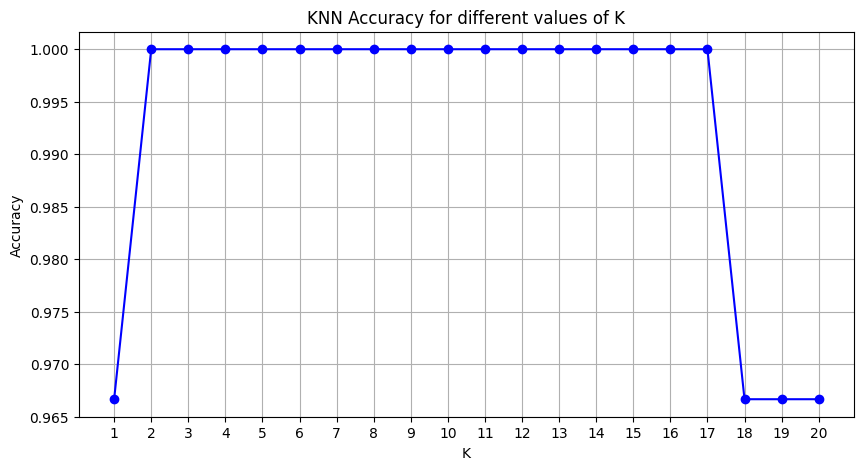

Best K = 2, Accuracy = 1.0000


In [18]:

accuracies = []
k_values = list(range(1, 21))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title('KNN Accuracy for different values of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Best K = {best_k}, Accuracy = {max(accuracies):.4f}")


In [19]:

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_final = knn_best.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



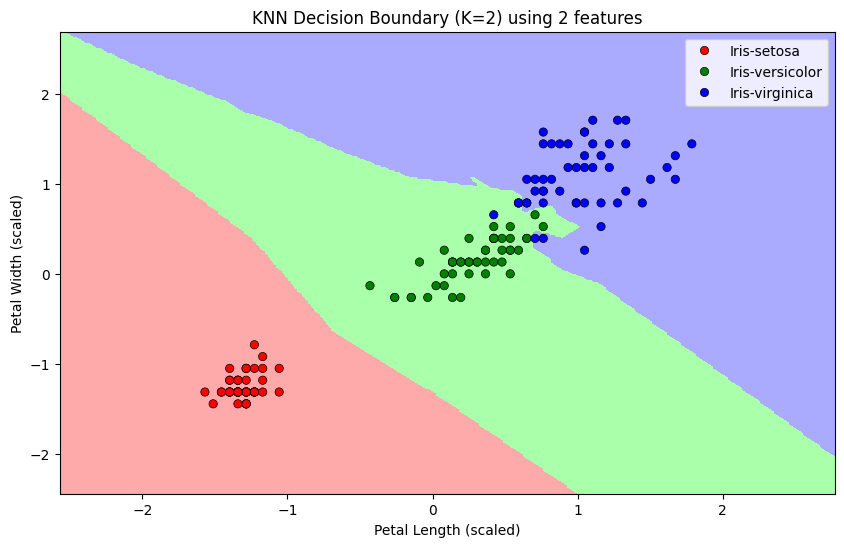

In [20]:

X_2d = df[['PetalLengthCm', 'PetalWidthCm']].values
y_2d = df['Species'].values


X_2d_scaled = StandardScaler().fit_transform(X_2d)


knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_2d_scaled, y_2d)

x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(x=X_2d_scaled[:, 0], y=X_2d_scaled[:, 1], hue=le.inverse_transform(y_2d),
                palette=cmap_bold, edgecolor='k')
plt.title(f"KNN Decision Boundary (K={best_k}) using 2 features")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.show()
